In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [50]:
df_nodate = df.drop(['date', 'sqft_basement', 'zipcode'], axis=1)
df_nodate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,47.6168,-122.045,1800,7503


In [27]:
df_2 = df.loc[:,['price','bedrooms','bathrooms','floors','view','zipcode', 'condition','sqft_living']]
df_2.head()

,price,bedrooms,bathrooms,floors,view,zipcode,condition,sqft_living
0,221900.0,3,1.00,1.0,0.0,98178,3,1180
1,538000.0,3,2.25,2.0,0.0,98125,3,2570
2,180000.0,2,1.00,1.0,0.0,98028,3,770
3,604000.0,4,3.00,1.0,0.0,98136,5,1960
4,510000.0,3,2.00,1.0,0.0,98074,3,1680


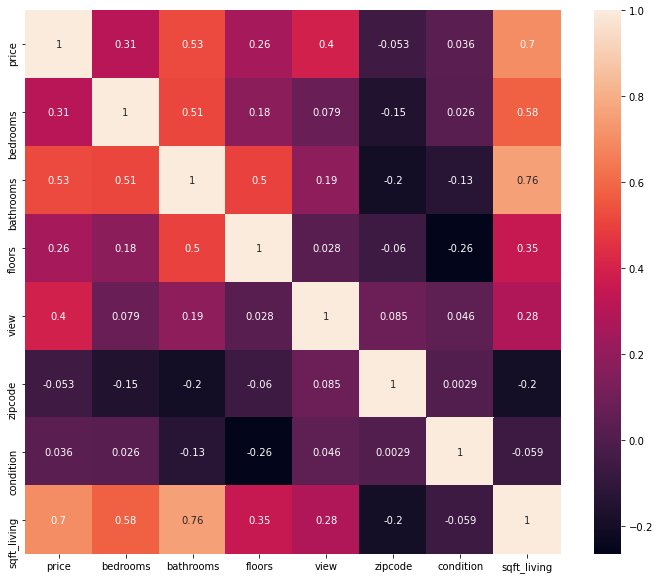

In [28]:
plt.subplots(figsize=(12,10))
ax = sns.heatmap(df_2.corr(), annot=True);

<AxesSubplot:title={'center':'House Data'}>

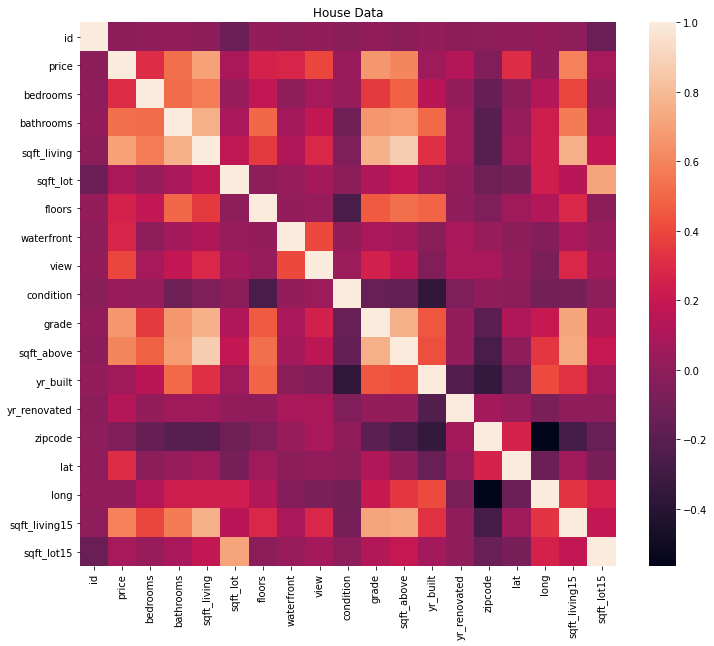

In [29]:
plt.subplots(figsize=(12,10))
ax = plt.axes()
ax.set_title("House Data")
corr= df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [30]:
results = smf.ols("bedrooms ~price", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:05:21   Log-Likelihood:                -27909.
No. Observations:               21597   AIC:                         5.582e+04
Df Residuals:                   21595   BIC:                         5.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9525      0.011    276.905      0.0

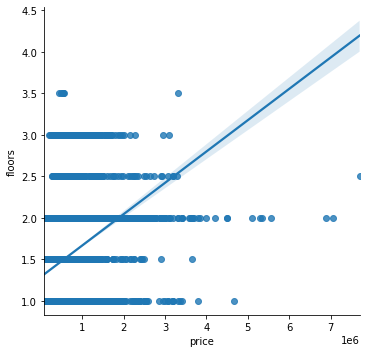

In [31]:
sns.lmplot(x="price", y="floors", data=df)

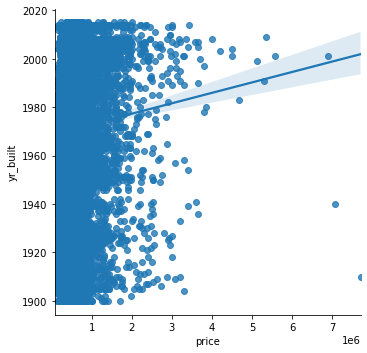

In [32]:
sns.lmplot(x="price", y="yr_built", data=df)

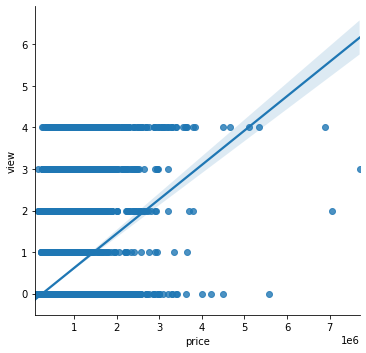

In [33]:
sns.lmplot(x="price", y="view", data=df)

In [34]:
results = smf.ols("price ~bathrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:05:25   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.1

In [35]:
df[df.bedrooms ==33]
df.bedrooms[15856] = 3

<ipython-input-35-adbe57747b52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bedrooms[15856] = 3


<AxesSubplot:xlabel='view', ylabel='price'>

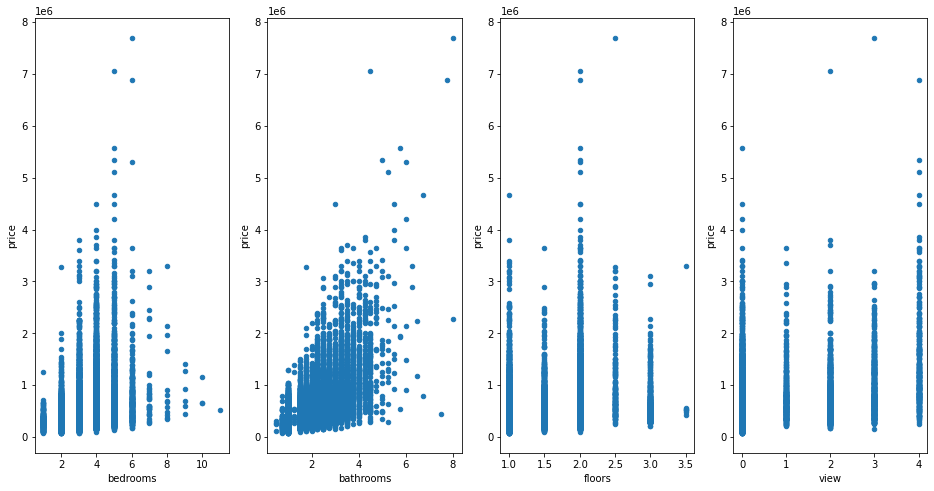

In [36]:
fig, axs = plt.subplots(1, 4,)
df.plot(kind='scatter', x='bedrooms', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='bathrooms', y='price', ax=axs[1])
df.plot(kind='scatter', x='floors', y='price', ax=axs[2])
df.plot(kind='scatter', x = 'view', y = 'price', ax=axs[3])

In [51]:
#Import the libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Importing the excel data 
df = pd.read_csv('../../../data/kc_house_data.csv')
x = df_nodate.iloc[:, :-1].values
y = df_nodate.iloc[:, 1].values

#Split the data into train and test dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)

#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(x_train,y_train)

#predict the test set
y_pred_test_data=regressorObject.predict(x_test)




ValueError: Input contains NaN, infinity or a value too large for dtype('float64').